In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

### Low Duration Outage

In [19]:
month = [12*i+8 for i in range(168)]
com = 1
com_folder = {1: 'SS',
              2: 'DS',
              3: 'RW'}
com_name = {1: 'Sunnyside Community',
              2: 'Dove Springs Community',
              3: 'Rogers Washington Community'}
Out = 'High'
OutDur = {'Low': 42, 'Med': 110, 'High': 106}
hours = np.array([0])
for _ in range(7):
        hours = np.concatenate((hours, np.array([6, 12, 18, 24])))
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun']
c = pd.read_csv('color.csv')['color']
x_color_l = ['black' for _ in range(16)] + ['red' for _ in range(10)] + ['black' for _ in range(168-26)]

base_data = pd.read_csv(f'{com_folder[com]}-report.csv')
opt_ES, opt_PV = base_data['ES1'].iloc[0]+base_data['ES2'].iloc[0], base_data['PV1'].iloc[0]+base_data['PV2'].iloc[0]

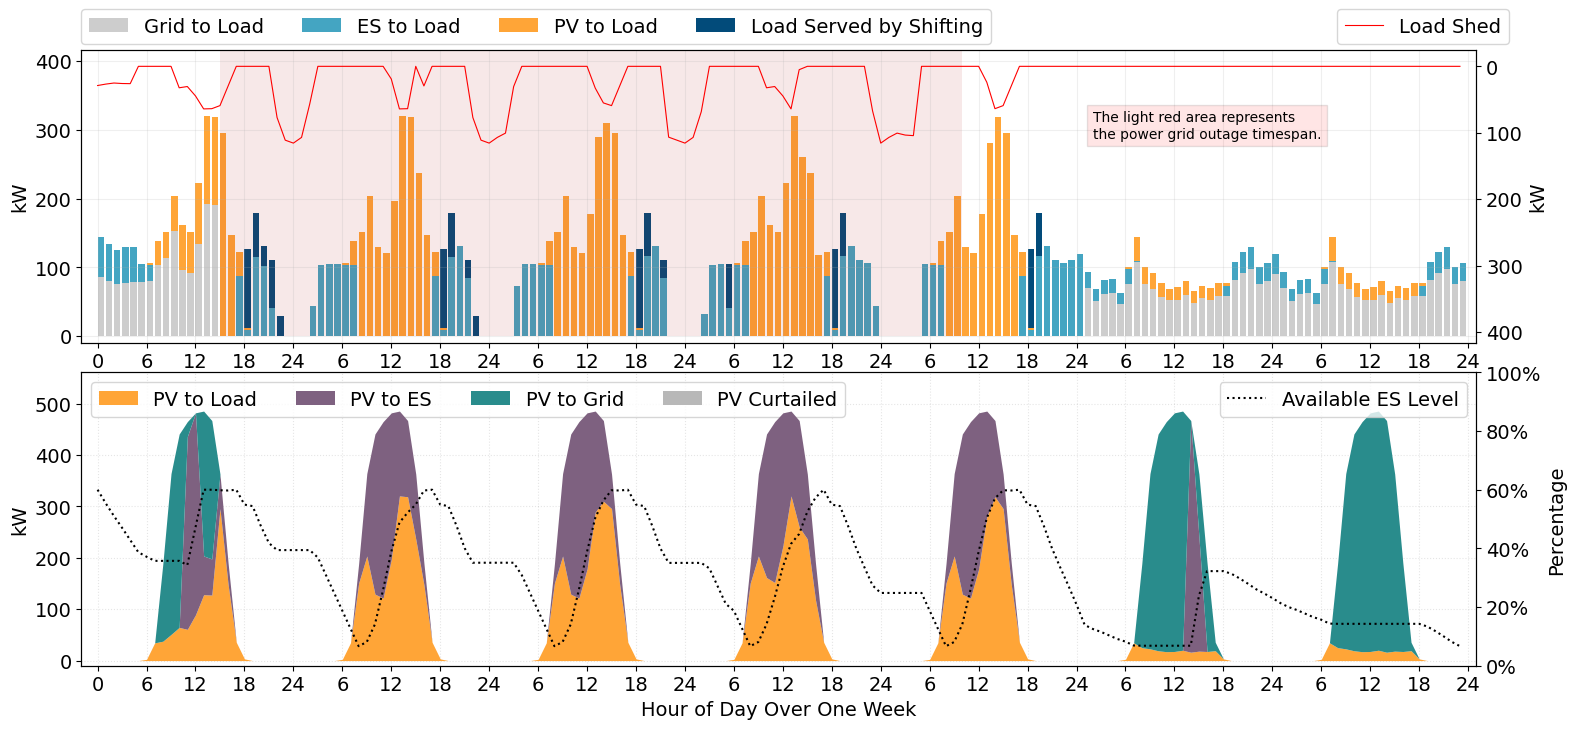

In [20]:
with open(f'{com_folder[com]} {Out}_Outage.pkl', 'rb') as handle:
    ESL, PVL, PVES, DGES, DGL, LT, LL, E, GL, GES, PVCur, PVGrid= pickle.load(handle)
handle.close()
itg = [(1, t, 1) for t in range(1, 169)]
rng = range(1, 169)

LTT_d = {(1, t, 1): sum([LT[(1, to, t, 1)] for to in range(1, t+1)]) for t in range(1, 169)}
LTF_d = {(1, t, 1): sum([LT[(1, t, to, 1)] for to in range(t, 169)]) for t in range(1, 169)}
LTF = np.array([LTF_d[i] for i in itg])
LTT = np.array([LTT_d[i] for i in itg])
ESL = np.array([ESL[i] for i in itg])
PVL = np.array([PVL[i] for i in itg])
PVES = np.array([PVES[i]  for i in itg])
DGES = np.array([DGES[i] for i in itg])
DGL = np.array([DGL[i] for i in itg])
LL = np.array([LL[i] for i in itg])
GL = np.array([GL[i] for i in itg])
EP = np.array([E[i]/opt_ES for i in itg])
PVCur = np.array([PVCur[i] for i in itg])
PVGrid = np.array([PVGrid[i] for i in itg])

'''Load Serving'''
fig, ax = plt.subplots(2, 1, figsize=(18, 8))
plt.rc('font', size=14)          # Controls default text sizes

ax[0].bar(rng, GL, color='#b8b8b8', align='edge', label='Grid to Load', alpha=0.7)

ax[0].bar(rng, ESL, bottom=GL, color='#44A5C2', align='edge', label='ES to Load')

ax[0].bar(rng, PVL, bottom=ESL+GL, color='#FFA537', align='edge', label='PV to Load')

ax[0].bar(rng, LTT, bottom=ESL+PVL+GL, color='#024B7A', align='edge', label='Load Served by Shifting')
ax[0].text(x=123, y=0.9*ax[0].get_ylim()[1], s='The light red area represents\nthe power grid outage timespan.', bbox=dict(facecolor='red', alpha=0.1), fontsize=10)
LoadLost = LL + LTF
ax[0].set_ylabel('kW')
ax[0].set_xticks([6*i+1 for i in range(29)], hours)
ax[0].set_xlim((-1, 170))

ylim1 = ax[0].get_ylim()[1]
ax[0].legend(loc=[0, 1.02], ncol = 5)
#ax[0].set_title(com_name[com], y=1.1)
ax[0].grid(alpha=0.2, zorder=-100)

# Load Lost Twin Plot
ax01 = ax[0].twinx()
ax01.plot(rng, LoadLost, color='red', label='Load Shed', linewidth=0.8)
ylim2 = ax01.get_ylim()[1]
ax01.set_ylabel('kW')
ax01.legend(loc=[0.9, 1.02], ncol=2)

max_y = 1.3*max(ylim1, ylim2)
ax[0].set_ylim((-10, max_y))
ax01.set_ylim((-25, max_y)[::-1])
ax01.grid(alpha=0)
ax[0].bar(range(16, 107), [max_y for _ in range(16, 107)],
        color='#B22222', align='edge', alpha=0.1, width=1)


'''PV Distribution'''

# Plotting the stacked lines
ax[1].fill_between(rng, PVL, label='PV to Load', color='#FFA537', linewidth=0, zorder=100)
ax[1].fill_between(rng, PVL, PVL+PVES, label='PV to ES', color='#7e6180', linewidth=0, zorder=100)
ax[1].fill_between(rng, PVL+PVES, PVL+PVES+PVGrid, label='PV to Grid', color='#298c8c', linewidth=0, zorder=100)
ax[1].fill_between(rng, PVL+PVES+PVGrid, PVL+PVES+PVGrid+PVCur, label='PV Curtailed', color='#b8b8b8', linewidth=0, zorder=100)


ax[1].set_xticks([6*i+1 for i in range(29)], hours)
ax[1].set_xlim((-1, 170))
ax[1].set_ylabel('kW')
ax[1].set_ylim((-10, 1.1*ax[1].get_ylim()[1]))
ax[1].set_xlabel('Hour of Day Over One Week')
ax[1].legend(ncol=4, loc='upper left')
ax[1].grid(color='gray', alpha=0.2, linestyle=':')

ax11 = ax[1].twinx()
ax11.plot(rng, EP, ':', label='Available ES Level', color='black')
ax11.set_ylim([0,1])
ax11.set_yticks([(2*i)/10 for i in range(6)], [f'{20*i}%' for i in range(6)])
ax11.legend(loc='upper right', ncol=2)
ax11.set_ylabel('Percentage')
plt.subplots_adjust(hspace=0.1)
plt.savefig(f'../IMG/{com_folder[com]}-{Out}_Outage.jpg', bbox_inches='tight', dpi=800)

In [49]:
len(LTT)

168